In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

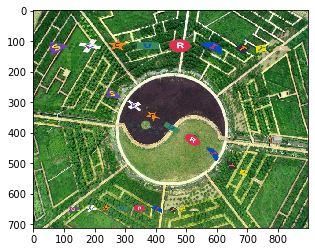

In [9]:
img = cv2.imread('./fancytest.jpg')
imshow(img)

This image is split into hue, saturation, and value channels. They are plotted below.

The blobs stand out the most in the hue channel, so it is used for further processing.

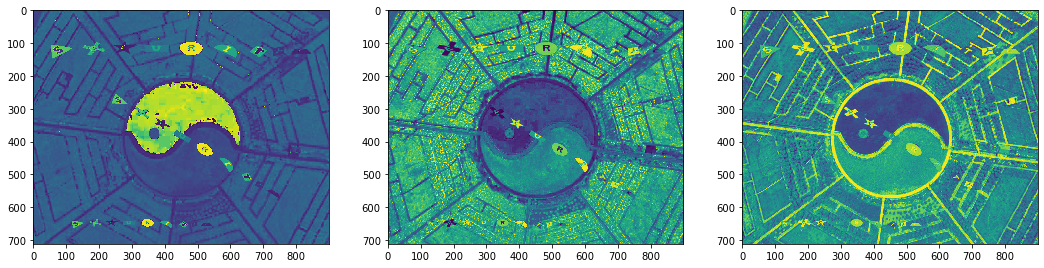

In [15]:
plt.figure(figsize=(18, 16))
hsv = (hue, sat, val) = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
for i, chan in enumerate(hsv):
    plt.subplot(1, 3, i+1)
    plt.imshow(chan)

Skimage's 3 different blob detection algorithms are run on the hue channel.

Laplacian of Guassian works the best, but determinant of hessian looks like it may work with a lower threshold. Difference of gaussian is much too inaccurate.

In [17]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

/usr/lib/python3.8/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/lib/python3.8/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/lib/python3.8/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/lib/python3.8/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
/usr/lib/python3.8/site-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/lib/python3.8/site-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)


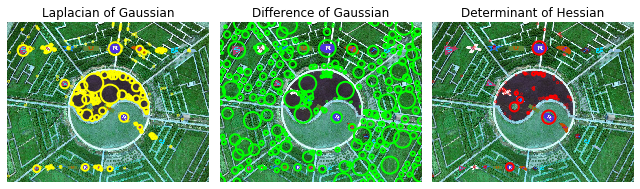

In [18]:
image_gray = hue
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

Below both the laplacian of guassian and determinant of hessian algorithms are run with lower thresholds.

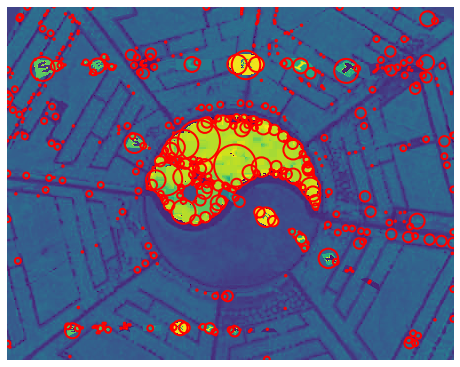

In [19]:
blobs_log = blob_log(hue, max_sigma=30, num_sigma=10, threshold=.05, overlap=0.9)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
fig, ax = plt.subplots(figsize=(8, 10))
plt.imshow(hue)

for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

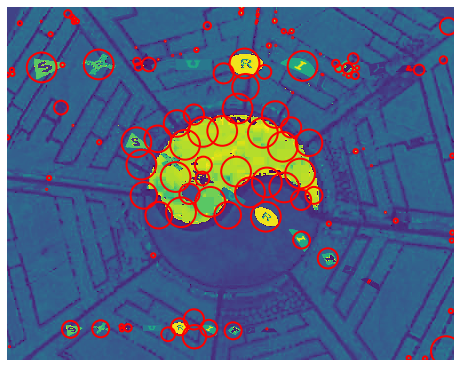

In [21]:
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.001)
fig, ax = plt.subplots(figsize=(8, 10))
plt.imshow(hue)

for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()

Below I run the three blob detection algorithms on the additional samples images. None are able to detect the yellow hexagon in the first image, likely because it has a very similar color to the grass. Thus, the LOG algorithm counts the road as the blobs and the hexagon as the non-road.

LOG has success with the other targets. DOH has proved itself innacurate.

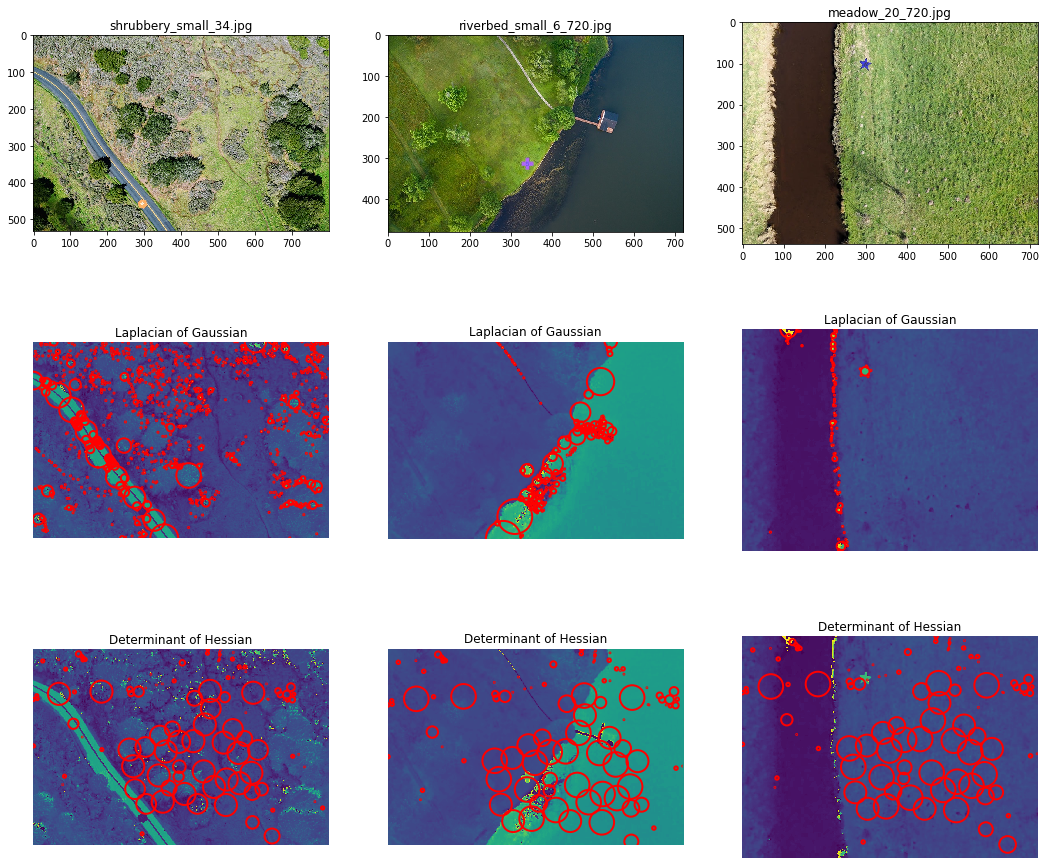

In [35]:
plt.figure(figsize=(18, 16))
for i, image in enumerate(('shrubbery_small_34.jpg', 'riverbed_small_6_720.jpg', 'meadow_20_720.jpg')):
    img = cv2.imread(image)
    hue, _, _ = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    
    ax = plt.subplot(3, 3, i+1)
    ax.set_title(image)
    imshow(img)
    
    ax = plt.subplot(3, 3, i+4)
    ax.set_title('Laplacian of Gaussian')
    blobs_log = blob_log(hue, max_sigma=30, num_sigma=10, threshold=.05, overlap=0.9)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    plt.imshow(hue)

    for blob in blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()
    
    ax = plt.subplot(3, 3, i+7)
    ax.set_title('Determinant of Hessian')
    blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.001)
    plt.imshow(hue)

    for blob in blobs_doh:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()